In [55]:
#Primeira parte: Para cada um dos 3 automatos probabilisticos de 2 nós, obter N padroes de M e visualizar
#com o três gráficos diferentes (stem plot, square wave, continuos bar)
#1 -> Definir matriz A. 2-> L[0] = 0; NC = 0. 3-> for i=1,(M-1): L[i] = 

#Segunda parte: gerar e visualizar os padrões produzidos pelos automatos.

In [56]:
from random import seed
from random import random
import numpy as np 

class Automatos:
    def __init__(self):
        self.A = []
        self.B = []
        self.r = random()

    def stochastic_matrix(self):
        k = 2 #k é o tamanho da matriz
        for i in range(k): #Cria uma matriz com zeros
            linha = []
            for j in range(k):
                linha.append(0)
            self.A.append(linha)
            
        for i in range(k): #Adiciona o primeiro elemento de todas as colunas com um aleatorio
            self.A[0][i] = random()
        
        #Como não consegui montar com eficiencia a matriz para NxN, vamos com a 2x2
        self.A[1][0] = 1 - self.A[0][0]
        self.A[1][1] = 1 - self.A[0][1]
            
        #for i in range(k): #colocar condicionais para montar a matriz de probabilidade
         #   for j in range(k): 
                
            
        A_array = np.array(self.A)
        #A_transpose = A_array.transpose()
        #return A_transpose
        return A_array

    def deterministic_automata(self, i):
        p = np.array([])
        A_transpose = self.stochastic_matrix().transpose()
        r = random()
        
        if i == 1:
            p = A_transpose[1]
            l = p[i]
            while r > l:
                i -= 1
                l += p[i]
        elif i == 0:
            p = A_transpose[0]
            l = p[i]
            while r > l:
                i += 1
                l += p[i]
        return i
    
joao = Automatos()
pedro = Automatos()

print(pedro.stochastic_matrix())

inter = 200
h = []
for i in range(inter):
    h.append(joao.deterministic_automata(1))
    
hl = np.append(h,1)
print(hl)

[[0.28247108 0.81554602]
 [0.71752892 0.18445398]]
[1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0
 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0
 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1]


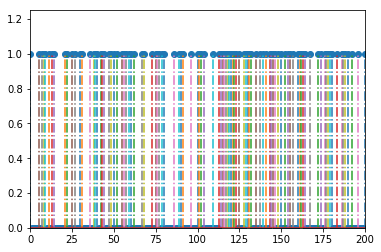

In [57]:
import matplotlib.pyplot as plt
from scipy import signal
import pylab

marks = np.arange(inter + 1)
stems = hl

pylab.xlim([0,inter])
pylab.ylim([0,1.25])

markerline, stemlines, baseline = plt.stem(marks, stems, '-.')

plt.show()

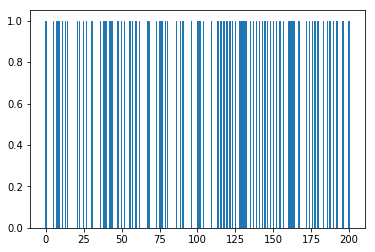

In [58]:
x = np.arange(inter+1)
plt.bar(x, hl)
plt.show()

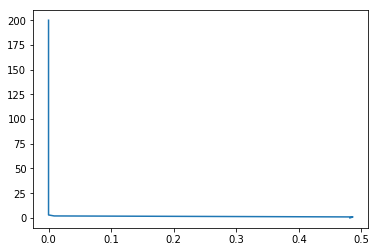

In [77]:
import math

media = np.mean(hl)
desvio = np.std(hl)

def probability_density(x):
    pdf = (1/(desvio*math.sqrt(2*math.pi)))*math.exp((-1/2)*((x-media)/desvio)**2)
    return pdf
k = []
for i in range(inter + 1):
    k.append(probability_density(i))

#print(k)
plt.plot(k, x)
plt.show()